# 4주차 : 트리(tree)

- <a href="#1.트리이해">1. 트리 이해</a>
- <a href="#2.트리응용">2. 트리 응용</a>

------------------------------

## <a name="1.트리이해">1. 트리 이해</a>

### 1-1. 트리 구조

#### #트리 여부 판단

In [1]:
from collections import defaultdict
def is_tree(edges):
    """
    edges: 노드 쌍의 리스트 [(u, v), (v, w), ...]
    트리 구조이면 True, 아니면 False를 반환
    """
    # 단방향 그래프로 구성
    graph = defaultdict(list)
    for u, v in edges:
        graph[u].append(v)
        graph[v].append(u)

    # 루트 노드 찾기
    root = None
    visited = set()
    for node in graph:
        if node not in visited:
            root = node
            break

    # DFS 탐색으로 사이클 검사
    stack = [root]
    visited.add(root)
    parent = {root: None}
    while stack:
        curr = stack.pop()
        for neighbor in graph[curr]:
            if neighbor not in visited:
                visited.add(neighbor)
                parent[neighbor] = curr
                stack.append(neighbor)
            elif neighbor != parent[curr]:
                return False

    # 모든 노드가 연결되어 있는지 확인
    return len(visited) == len(graph)

edges = [(1, 2), (1, 3), (2, 4), (2, 5), (3, 6)]
if is_tree(edges) :  print('트리 구조') 
else : '트리 구조 아님'

트리 구조


#### #트리 그리기

In [ ]:
!pip install graphviz

In [ ]:
!pip install networkx

In [ ]:
!pip install pydot

- 방법1: graphviz 를 이용한 트리 그리기

In [3]:
import graphviz

class TreeNode:
    def __init__(self, val):
        self.val = val
        self.left = None
        self.right = None

def draw_tree(root):
    if not root:
        return None

    dot = graphviz.Digraph()
    nodes = []
    stack = [(root, None)]

    while stack:
        node, parent = stack.pop()
        node_name = str(node.val)
        nodes.append(node_name)
        dot.node(node_name, label=node_name)

        if parent:
            dot.edge(parent, node_name)

        if node.left:
            stack.append((node.left, node_name))
        if node.right:
            stack.append((node.right, node_name))

    dot.render('tree', view=True)

# 예시 사용법
root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(3)
root.left.left = TreeNode(4)
root.left.right = TreeNode(5)

draw_tree(root)

- 방법2: networkx를 이용한 그래프 그리기

In [4]:
import warnings
warnings.filterwarnings('ignore')

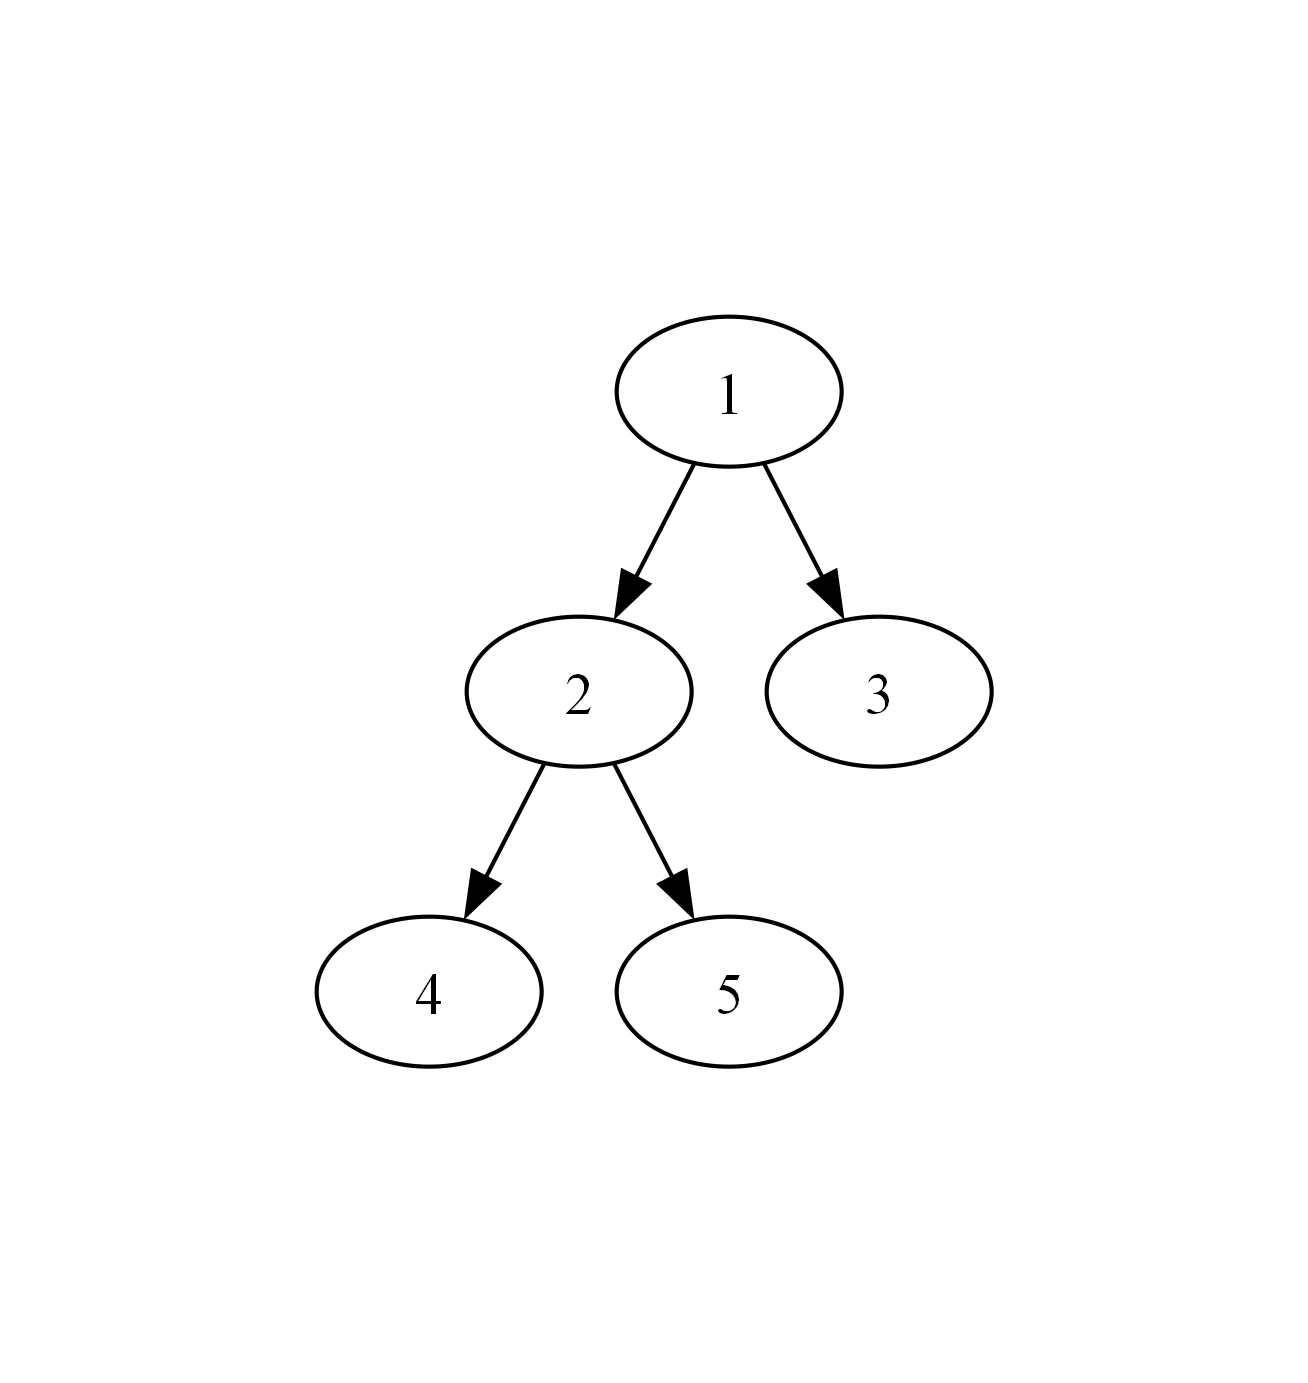

In [5]:
# 트리 그리기
def drawTree(V, E, isDirect=0, D=0, W=300):  # 기본 isDirect=무향, D=가로방향, W=크기
    from IPython.core.display import Image
    import networkx as nx

    if isDirect: G = nx.DiGraph()  # DirectedGraph(유향 그래프)
    else: G = nx.Graph()           # Graph(무향 그래프)

    G.add_nodes_from(V) # 점 추가
    G.add_edges_from(E) # 간선 추가

    d1 = nx.drawing.nx_pydot.to_pydot(G)  #  pydot graph  
    d1.set_dpi(300)        # 도화지의 크기, 1인치에 넣을 dots의 개수 
    if D==0: d1.set_rankdir("LR")   # 수평방향 --> 이 코드 없으면 수직방향
    d1.set_margin(1)
    img = Image(d1.create_png(), width=W)
    display(img)

V = [1,2,3,4,5]
E = [(1,3),(1,2),(2,4),(2,5)]

drawTree(V, E, 1, 1)

----------------

### [Quiz] 루트 노드 찾기

In [7]:
from collections import defaultdict
def find_root(edges):
    # 인접 리스트 생성
    adj_list = defaultdict(list)
    in_degree = defaultdict(int)

    for u, v in edges:
        adj_list[u].append(v)
        in_degree[v] += 1

    # 진입 차수가 0인 노드를 루트 노드로 간주
    for node in adj_list:
        if in_degree[node] == 0:
            return node

    # 루트 노드가 없는 경우 (사이클이 존재하는 경우)
    return None

edges = [('v2','v3'),('v2','v1'),('v4','v5'),('v4','v6'),('v5','v8'),
         ('v6','v7'),('v4','v2'),('v7','v9'),('v7','v10')]

print(f'root node: {find_root(edges)}')
# drawTree(V, edges, 1, 1)

root node: v4


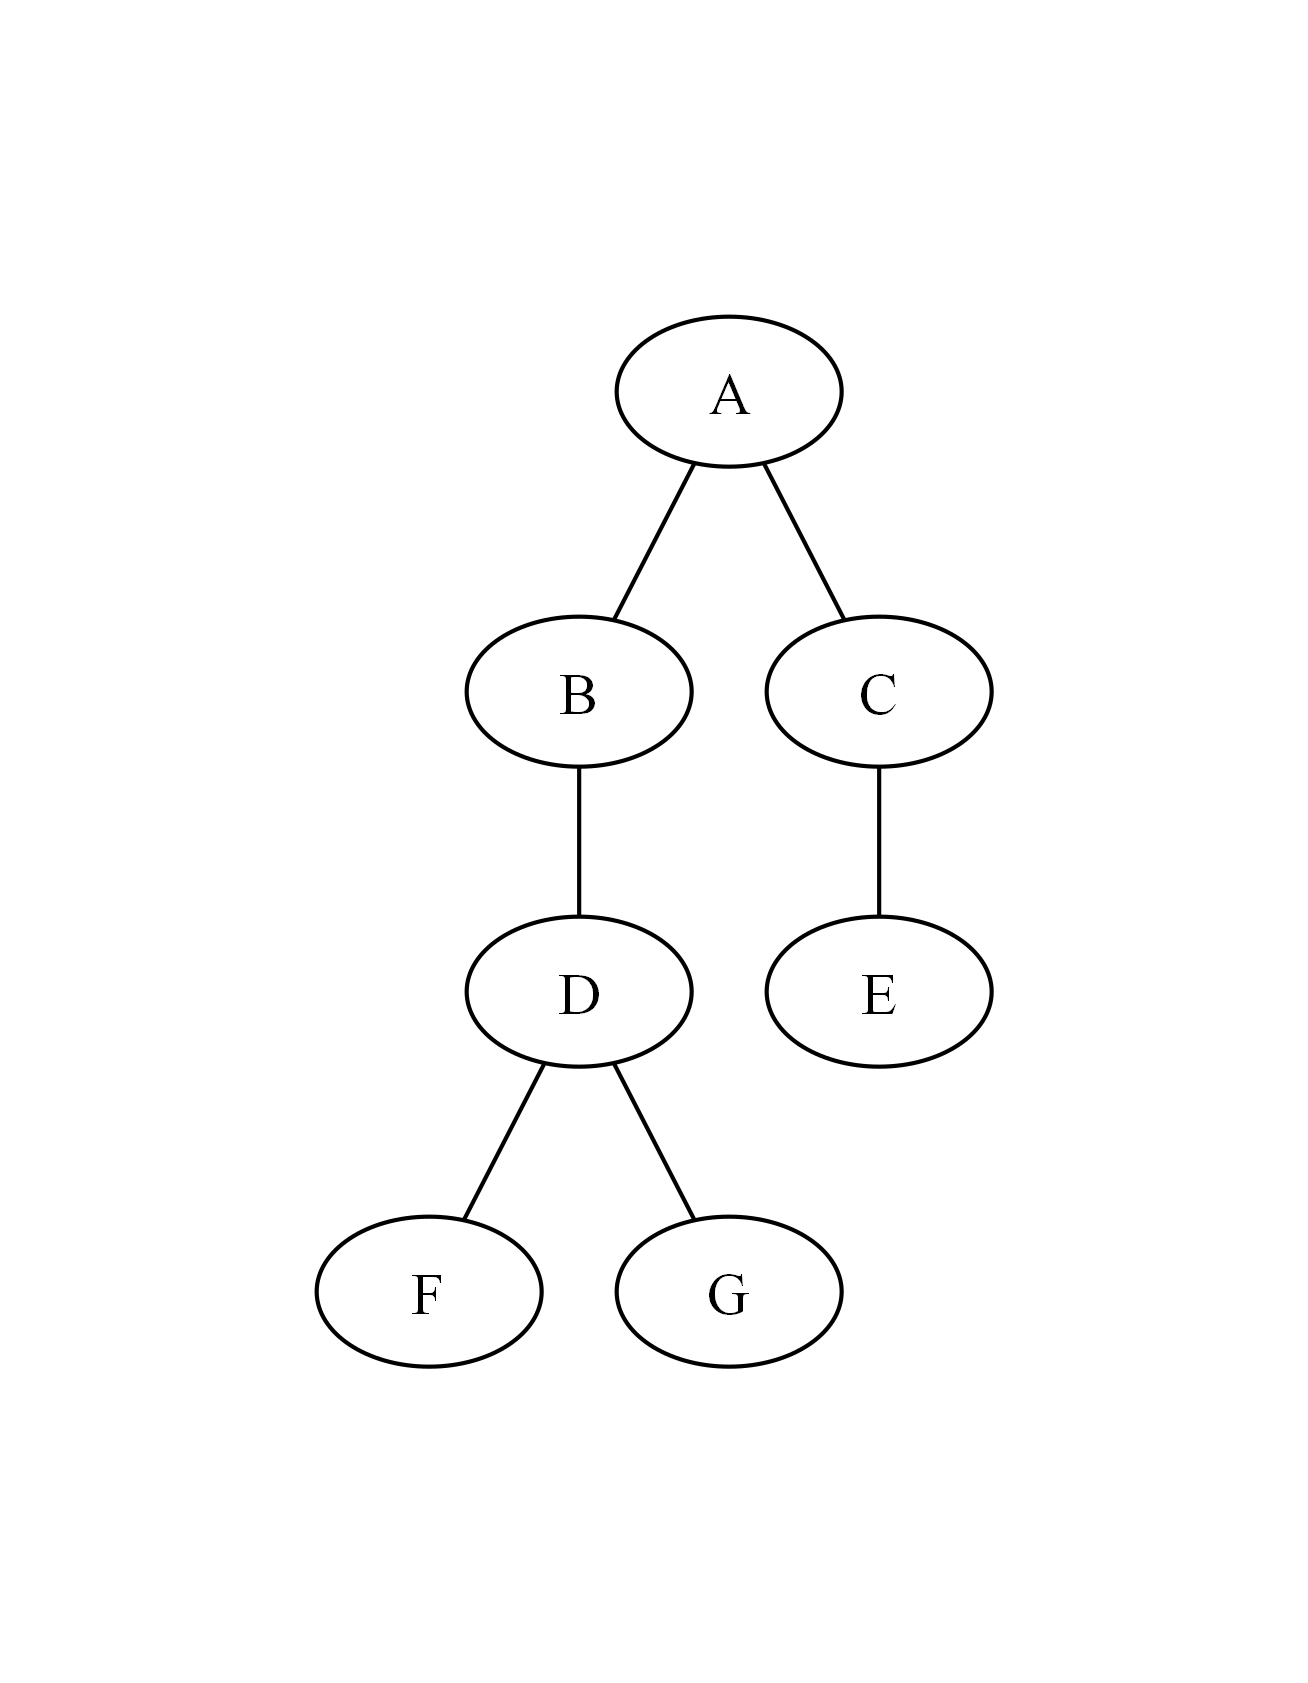

In [8]:
vertices = [chr(code) for code in range(65,72)] #알파벳 대문자 아스키코드
edges = [('A','B'),('A','C'),('B','D'),('C','E'),('D','F'), ('D','G')]
drawTree(vertices, edges, D=1, W=300)  #(V, E, D:가로방향, W:그래프크기)

--------------------------

### 1-2. 이진 트리

#### #이진 트리의 표현 방법 : 연결된 구조 표현(링크 표현법)

In [ ]:
# 이진트리를 위한 노드 클래스
class BTNode:
    def __init__ (self, elem, left=None, right=None):   #(노드명, 왼쪽 노드명, 오른쪽 노드명)
        self.data = elem 
        self.left = left        # 왼쪽 자식을 위한 링크
        self.right = right      # 오른쪽 자식을 위한 링크

    def isLeaf(self):
        return self.left is None and self.right is None
        

------------------------

### 1-3. 이진 트리 연산
- 노드 순회(traversal) 
- 전체 노드 수 (count nodes)
- 트리 높이 계산(calculate tree height)

#### #노드 표준순회 방법(traversal)
- 전위 순회(preorder traversal)  ：VLR
- 중위 순회(inorder traversal)   ：LVR
- 후위 순회(postorder traversal) ：LRV


In [ ]:
# 이진트리의 전위순회
def preorder(n) :
    if n is not None :
        print('(', end=' ')     # 중첩된 괄호 표현을 위한 출력
        print(n.data, end=' ')
        preorder(n.left)
        preorder(n.right)
        print(')', end=' ')     # 중첩된 괄호 표현을 위한 출력


In [ ]:
# 이진트리의 중위 순회
def inorder(n) :
    if n is not None :
        inorder(n.left)
        print(n.data, end=' ')
        inorder(n.right)
        

In [ ]:
# 이진트리의 후위 순회
def postorder(n) :
    if n is not None :
        postorder(n.left)
        postorder(n.right)
        print(n.data, end=' ')
        

#### #레벨 순회(level order)

In [ ]:
# 이진트리의 레벨 순회
def levelorder(root) :
    queue = ArrayQueue()   # 원형 큐 사용
    queue.enqueue(root)
    while not queue.isEmpty() :
        n = queue.dequeue()
        if n is not None :
            print(n.data, end=' ')
            queue.enqueue(n.left)
            queue.enqueue(n.right)


#### #전체 노드 수 구하기
순환 이용: 왼쪽 서브 트리 노드 수 + 오른쪽 서브 트리 노드 수 + 1(루트 노드)

In [ ]:
# 이진트리의 노드의 개수 구하기
def count_node(n) :
    if n is None : 
        return 0
    else : 
        return 1 + count_node(n.left) + count_node(n.right)

#### #트리 높이 구하기
순환 이용: 왼쪽 서브 트리 높이와 오른쪽 서브 높이 중 큰 값 + 1(루트 노드)ㅡ

In [ ]:
# 이진트리의 높이 구하기
def calc_height(n) :
    if n is None : 
        return 0
    hLeft = calc_height(n.left)
    hRight = calc_height(n.right)
    if (hLeft > hRight) : return hLeft + 1
    else: return hRight + 1

### [실습문제] 이진 트리 만들어 테스트 하기(통합)

#### 1.(이진트리 레벨 순회를 위한) 원형 큐

In [ ]:
# 2주차에서 학습한 원형 큐 예)
class ArrayQueue:
    def __init__(self, capacity=10):    
        self.capacity = capacity
        self.array = [None] * capacity
        self.front = 0
        self.rear = 0
        
    # 2.(원형 큐) : 공백 상태와 포화 상태 검사
    def isEmpty(self):
        return self.front == self.rear

    def isFull(self):
        return self.front == (self.rear+1)%self.capacity  
    
    # 3.(원형 큐) : 삽입 연산
    def enqueue(self, item):
        if not self.isFull():
            self.rear = (self.rear+1)%self.capacity # 후단 회전
            self.array[self.rear] = item
        else:
            print('stack overflow!')
            pass
            
    # 4.(원형 큐) : 삭제 연산
    def dequeue(self):
        if not self.isEmpty():
            self.front = (self.front+1)%self.capacity  # 전단 회전
            return self.array[self.front]
        
    # 5. (원형 큐) : 상단 참조 연산
    def peek(self):
        if not self.isEmpty():
            return self.array[(self.front+1)%self.capacity]
        else: pass
        
    # 6. (원형 큐) : 전체 요소 수
    def size(self):
        return (self.rear - self.front + self.capacity) % self.capacity
    
    # 7. (원형 큐) : 전체 요소 화면에 출력
    def display(self, msg='Queue: '):
        print(msg, end='=[')
        count = self.size()
        for i in range(count):
            print(self.array[(self.front+1+i)%self.capacity], end=' ')
        print("]")

#### 2.이진 트리 통합 클래스와 함수들

In [ ]:
# 이진트리를 위한 노드 클래스
class BTNode:
    def __init__ (self, elem, left=None, right=None):
        self.data = elem 
        self.left = left        # 왼쪽 자식을 위한 링크
        self.right = right      # 오른쪽 자식을 위한 링크

    def isLeaf(self):
        return self.left is None and self.right is None


# 이진트리의 전위순회
def preorder(n) :
    if n is not None :
        print('(', end=' ')     # 중첩된 괄호 표현을 위한 출력
        print(n.data, end=' ')
        preorder(n.left)
        preorder(n.right)
        print(')', end=' ')     # 중첩된 괄호 표현을 위한 출력

# 이진트리의 중위 순회
def inorder(n) :
    if n is not None :
        inorder(n.left)
        print(n.data, end=' ')
        inorder(n.right)

# 이진트리의 후위 순회
def postorder(n) :
    if n is not None :
        postorder(n.left)
        postorder(n.right)
        print(n.data, end=' ')


# 이진트리의 레벨 순회
def levelorder(root) :
    queue = ArrayQueue()
    queue.enqueue(root)
    while not queue.isEmpty() :
        n = queue.dequeue()
        if n is not None :
            print(n.data, end=' ')
            queue.enqueue(n.left)
            queue.enqueue(n.right)


# 이진트리의 노드의 개수 구하기
def count_node(n) :
    if n is None : 
        return 0
    else : 
        return 1 + count_node(n.left) + count_node(n.right)

# 이진트리의 높이 구하기
def calc_height(n) :
    if n is None : 
        return 0
    hLeft = calc_height(n.left)
    hRight = calc_height(n.right)
    if (hLeft > hRight) : return hLeft + 1
    else: return hRight + 1


### [실습문제] 이진 트리 연산 테스트
앞에서 구성한 이진 트리 클래스(BTNode)와 연산 방법을 파이썬으로 구현하고 결과를 출력하세요.
1. 옆 트리를 구현하세요.
2. 전위 순회 결과를 출력하세요.
3. 중위 순회 결과를 출력하세요
4. 후위 순회 결과를 출력하세요
5. 레벨 순회 결과를 출력하세요.
6. 전체 노드의 수를 출력하세요.
7. 트리의 높이를 출력하세요. 

In [ ]:
# 1.옆 트리를 구현하세요.
# 단말 노드 --> 루트 노드 순으로 노드 추가한다.
F = BTNode('F', None, None) #  (노드명, 왼쪽, 오른쪽)
G = BTNode('G', None, None)
D = BTNode('D', F, G)
E = BTNode('E', None, None)
B = BTNode('B', D, None)
C = BTNode('C', E, None)
root = BTNode('A', B, C)

# 2.전위 순회 결과를 출력하세요.
print('2.  Pre-Order : ', end=''); preorder(root)
print()

# 3.중위 순회 결과를 출력하세요
print('3.   In-Order : ', end=''); inorder(root)
print()

# 4.후위 순회 결과를 출력하세요
print('4. Post-Order : ', end=''); postorder(root)
print()

# 5.레벨 순회 결과를 출력하세요.
print('5.Level-Order : ', end=''); levelorder(root)
print()

# 6.전체 노드의 수를 출력하세요.
print("\n6. 노드의 개수 = %d개" % count_node(root))

# 7.트리의 높이를 출력하세요
print("7. 트리의 높이 = %d" % calc_height(root))
print()

-----------------

## <a name="2.트리응용">2. 트리 응용</a>

### 2-1. 모스 코드(Morse Code) 결정 트리

#### #문자를 모스 코드로 변환하는 과정: 인코딩

- **코드 표(Table)**

In [ ]:
# 영어 대문자에 대한 모스코드 표
table =[('A', '.-'),    ('B', '-...'),  ('C', '-.-.'),  ('D', '-..'),
        ('E', '.'),     ('F', '..-.'),  ('G', '--.'),   ('H', '....'),
        ('I', '..'),    ('J', '.---'),  ('K', '-.-'),   ('L', '.-..'),
        ('M', '--'),    ('N', '-.'),    ('O', '---'),   ('P', '.--.'),
        ('Q', '--.-'),  ('R', '.-.'),   ('S', '...'),   ('T', '-'),
        ('U', '..-'),   ('V', '...-'),  ('W', '.--'),   ('X', '-..-'),
        ('Y', '-.--'),  ('Z', '--..') ]


- **인코딩 함수**

In [ ]:
def encode(ch):
    idx = ord(ch.upper())-ord('A')  # 해당 문자의 인덱스
    return table[idx][1]            # 해당 모스 부호 반환   

In [ ]:
# 테스트
msg = 'sos'
for i in msg:
    print(encode(i), end='')

#### #모스 코드를 문자로 변환하는 과정: 디코딩

- **디코딩 함수**

In [ ]:
# 단순한 방법의 모스코드 디코딩 함수
def decode_simple(morse):
    for tp in table :               # 모스 코드 표의 모든 문자에 대해
        if morse == tp[1] :         # 찾는 코드와 같으면
            return tp[0]            # 그 코드의 문자를 반환               

#### #결정 트리를 이용한 모스 코드의 디코딩

- **모스 코드를 위한 결정 트리 만들기**

In [ ]:
# 결정트리 노드 클래스
class TNode:
    def __init__ (self, elem, left, right):
        self.data = elem 
        self.left = left
        self.right = right                         

In [ ]:
# 모스코드 디코딩을 위한 결정트리 만들기
def make_morse_tree():
    root = TNode( None, None, None )
    for tp in table :
        code = tp[1]                    # 모스 코드
        node = root
        for c in code :                 # 맨 마지막 문자 이전까지 --> 이동
            if c == '.' :               # 왼쪽으로 이동
                if node.left == None :  # 비었으면 빈 노드 만들기
                    node.left = TNode (None, None, None)
                node = node.left        # 그쪽으로 이동
            elif c == '-' :             # 오른쪽으로 이동
                if node.right == None : # 비었으면 빈 노드 만들기
                    node.right = TNode (None, None, None)
                node = node.right     # 그쪽으로 이동

        node.data = tp[0]               # 코드의 알파벳
    return root
    

- **결정트리(decision tree)를 이용한 디코딩 함수**

In [ ]:
# 결정트리를 이용한 디코딩 함수
def decode(root, code):
    node = root
    for c in code :                 # 맨 마지막 문자 이전까지 --> 이동
        if c == '.' :               # 왼쪽으로 이동
            node = node.left
        elif c=='-' :
           node = node.right
    return node.data                                                   

### [실습문제] 결정트리를 이용한 모스 코드 테스트

In [ ]:
# 모스코드 인코딩과 디코딩 테스트 프로그램
morseCodeTree = make_morse_tree()  # 모스코드 트리

str = input("1.입력 문장 : ")

morselist = []                    # 모스코드 리스트
for ch in str:
    code = encode(ch)
    morselist.append(code)
print("2.Morse Code: ", morselist)
print("3.Decoding  : ", end='')
for code in morselist:
    ch = decode(morseCodeTree, code)
    print(ch, end='')
print()

--------------------------------------------------------

### 2-2. 수식 트리

#### #수식 트리(Expression Tree)
- 산술식을 트리 형태로 표현한 이진 트리
- 수식 트리는 하나의 연산자가 두 개의 피연산자를 갖는다고 가정

#### #수식 트리의 계산
**앞에서 만든 이진 트리BTNode 클래스와 연산 그대로 사용한다.**

In [ ]:
# 수식트리 계산 함수
def evaluate(node) :
    if node is None :                 # 공백 트리면 0 반환
       return 0
    elif node.isLeaf() :              # 단말 노드이면 --> 피연산자
       return node.data               # 그 노드의 값(데이터) 반환
    else :                            # 루트나 가지노드라면 --> 연산자
        op1 = evaluate(node.left)     # 왼쪽 서브트리 먼저 계산
        op2 = evaluate(node.right)    # 오른쪽 서브트리 먼저 계산
        if node.data == '+' : return op1 + op2
        elif node.data == '-' : return op1 - op2
        elif node.data == '*' : return op1 * op2
        elif node.data == '/' : return op1 / op2
            

#### #수식 트리 만들기

In [ ]:
# 후위표기 수식을 이용한 수식트리 만들기
def buildETree( expr ):
    if len(expr) == 0 :                 
        return None

    token = expr.pop()                  
    if token in "+-*/" :                
        node = BTNode(token)            
        node.right= buildETree(expr)    
        node.left = buildETree(expr)    
        return node
    else :                              
        return BTNode(float(token))     


In [ ]:
# 전위표기 수식을 이용해 수식트리를 만들고 루트를 반환함
def buildETree2( expr ):
    if len(expr) == 0 :                 
        return None

    token = expr.pop(0)                 
    if token in "+-*/" :                
        node = BTNode(token)            
        node.left = buildETree2(expr)   
        node.right= buildETree2(expr)   
        return node
    else :                              
        return BTNode(float(token)) 


### [실습문제] 수식 트리 테스트

In [ ]:
# 수식트리 테스트 프로그램
txt = input("입력(후위표기): ")		# 후위표기식 입력
expr = txt.split()			        # 토큰 리스트로 변환
print("토큰분리(expr): ", expr)
root = buildETree(expr)			    # 후위표기 --> 수식트리
print('\n전위 순회: ', end=''); preorder(root)
print('\n중위 순회: ', end=''); inorder(root)
print('\n후위 순회: ', end=''); postorder(root)
print('\n계산 결과 : ', evaluate(root))	# 수식트리 계산


----------------------
THE END